<a href="https://colab.research.google.com/github/nadaAlruwaythi/Riyadh_Resturants/blob/main/riyadh_resturants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv('riyadh_resturants_clean.csv')
df.tail(1)

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
19360,Klijaz Foodtruck كليجز فودترك,Food Truck,"الرياض 13316, المملكة العربية السعودية",24.939546,46.76495,Cheap,8.0,21,2,7.8,8.0


In [27]:
df.price.value_counts()

Cheap             13499
Moderate           3981
Expensive           303
Very Expensive       63
Name: price, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19361 entries, 0 to 19360
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           19361 non-null  object 
 1   categories     19361 non-null  object 
 2   address        19361 non-null  object 
 3   lat            19361 non-null  float64
 4   lng            19361 non-null  float64
 5   price          17846 non-null  object 
 6   likes          19359 non-null  float64
 7   photos         19361 non-null  int64  
 8   tips           19361 non-null  int64  
 9   rating         7949 non-null   float64
 10  ratingSignals  7949 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.6+ MB


In [29]:
df.isnull().sum()

name                 0
categories           0
address              0
lat                  0
lng                  0
price             1515
likes                2
photos               0
tips                 0
rating           11412
ratingSignals    11412
dtype: int64

In [30]:
df.duplicated().sum()

1

In [31]:
df.drop_duplicates().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


name             مطعم وقت الشوايةديوانية عكاظشاهي جمر راعي الجم...
categories       Afghan RestaurantCaféCoffee ShopAfghan Restaur...
address          الرياض 14723, المملكة العربية السعوديةالرياض 1...
lat                                                  478629.230535
lng                                                  904060.566116
likes                                                    1231407.0
photos                                                     3248252
tips                                                        330894
rating                                                     59896.5
ratingSignals                                            1602798.0
dtype: object

In [23]:
df.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'price', 'likes',
       'photos', 'tips', 'rating', 'ratingSignals'],
      dtype='object')

In [32]:
df.drop(columns=['ratingSignals','lat','lng'],inplace=True)

In [35]:
df.isnull().sum()

name              0
categories        0
address           0
price             0
likes             2
photos            0
tips              0
rating        11412
dtype: int64

- Frist solve null in price by using most frequent 

In [36]:

imputer = SimpleImputer(missing_values=np.NAN, strategy='most_frequent')
df.price = imputer.fit_transform(df['price'].values.reshape(-1,1))[:,0]

df.head(1)

,name,categories,address,price,likes,photos,tips,rating
0,مطعم وقت الشواية,Afghan Restaurant,"الرياض 14723, المملكة العربية السعودية",Moderate,0.0,0,0,NaN


-  solve the null in the rating with fall 0

In [38]:
df['rating'] =  df['rating'].fillna(0)


 - solve the null in likes with fall by 0 and convert to integer

In [41]:
df['likes']=df['likes'].fillna(0).astype(int)

#### Now data is clean to use 

In [67]:
data=(df.groupby(['categories'])['rating'].max().head(10))
data

categories
Afghan Restaurant                               8.8
Afghan Restaurant, Middle Eastern Restaurant    7.9
African Restaurant                              7.0
American Restaurant                             9.3
American Restaurant, Asian Restaurant           7.7
American Restaurant, Austrian Restaurant        0.0
American Restaurant, BBQ Joint                  8.3
American Restaurant, Burger Joint               7.2
American Restaurant, Café                       0.0
American Restaurant, Diner                      0.0
Name: rating, dtype: float64

- Top 10 of the restaurants with the highest Likes

In [88]:
Top_10 = (df.groupby(["categories"])[['likes']].sum().reset_index().head(10))
Top_10

,categories,likes
0,Afghan Restaurant,859
1,"Afghan Restaurant, Middle Eastern Restaurant",63
2,African Restaurant,101
3,American Restaurant,15983
4,"American Restaurant, Asian Restaurant",14
5,"American Restaurant, Austrian Restaurant",0
6,"American Restaurant, BBQ Joint",186
7,"American Restaurant, Burger Joint",1458
8,"American Restaurant, Café",0
9,"American Restaurant, Diner",0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

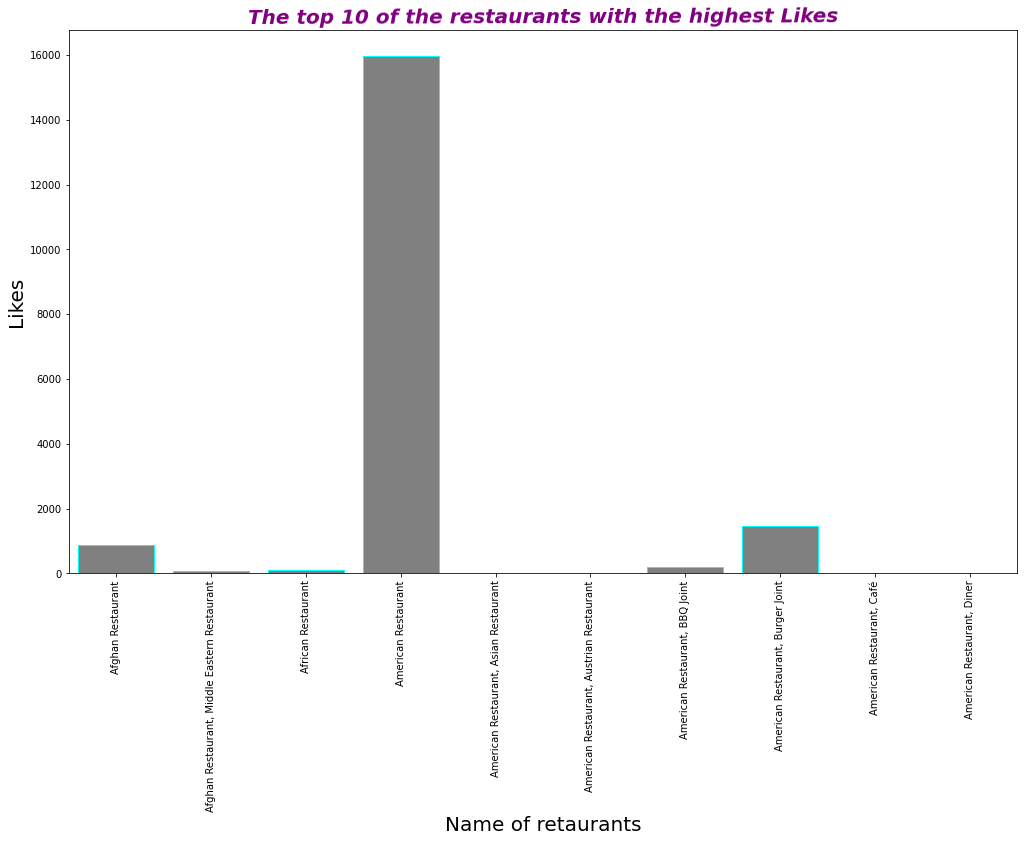

In [96]:
plt.subplots(figsize=(17,10))

sns.barplot(data=Top_10, x=Top_10['categories'][:10],y =Top_10['likes'][:10],color=(0.5, 0.5, 0.5, 0.5),  edgecolor='cyan')
plt.title('The top 10 of the restaurants with the highest Likes', style='italic',fontsize=20,weight='bold',rotation=0.17,color='purple');
plt.xlabel('Name of retaurants',fontsize=20)
plt.ylabel('Likes',fontsize=20);
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees

